<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/Gamma_TelescopeMAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: Machine Learning for everybody youtube video

https://www.youtube.com/watch?v=i_LwzRVP7bg&ab_channel=freeCodeCamp.org

# Data preparation

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).


https://archive.ics.uci.edu/ml/datasets/magic%2Bgamma%2Btelescope

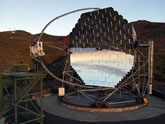


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha","fDist", "class"]

In [6]:
data = pd.read_csv("/content/drive/MyDrive/magic04.data", names=cols)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [7]:
#change "g" to 0, "h" to 1
data["class"] = (data["class"] == "g").astype(int)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


12


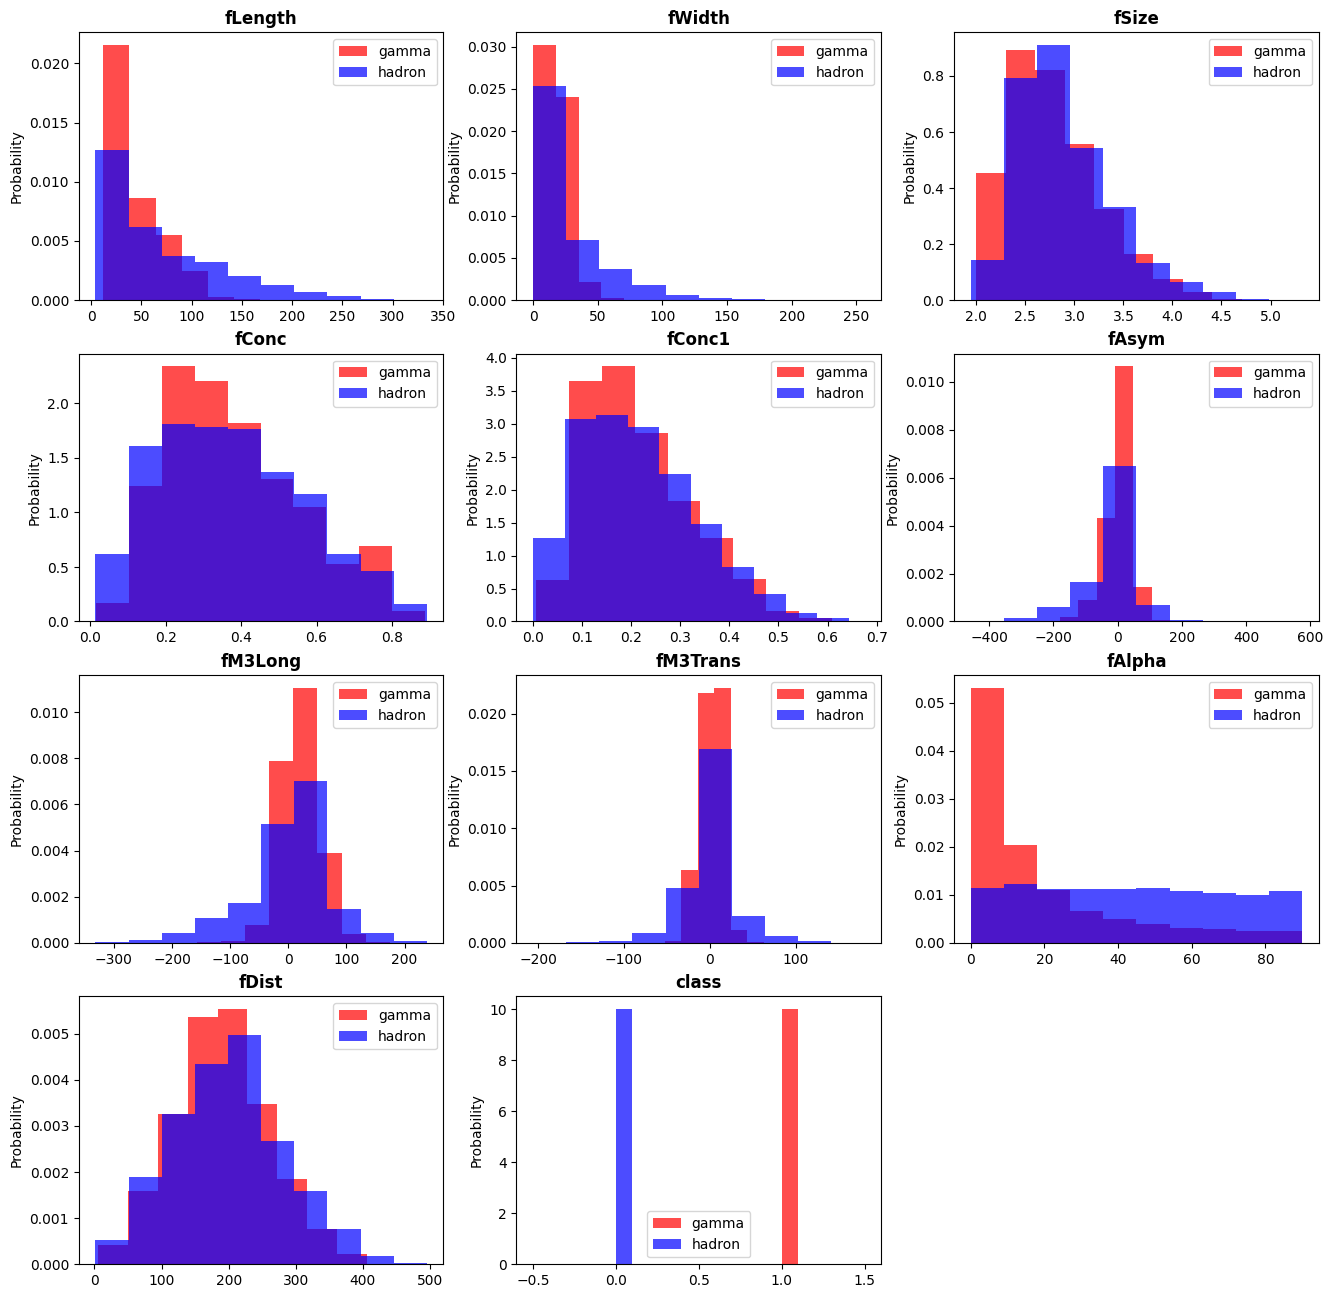

In [26]:
plt.figure(figsize=(16,16))
i = 1

for label in cols[:]:
    plt.subplot(4,3,i)
    plt.hist(data[data["class"]==1][label], color="red", label='gamma',alpha = 0.7, density=True)
    plt.hist(data[data["class"]==0][label], color="blue", label='hadron', alpha=0.7, density=True)
    plt.title(label, fontdict={'fontweight':'bold'})
    plt.ylabel("Probability")
    plt.xlabel('')
    plt.legend()
    i += 1
print(i)
plt.show()

# Spliting

In [59]:
train, val, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [60]:
train.shape, val.shape, test.shape

((11412, 11), (3804, 11), (3804, 11))

In [68]:
print(train.max(), '\n'*3, train.min())

fLength     305.0961
fWidth      256.3820
fSize         5.1467
fConc         0.8912
fConc1        0.6740
fAsym       464.6310
fM3Long     238.3210
fM3Trans    179.8510
fAlpha       90.0000
fDist       466.4078
class         1.0000
dtype: float64 


 fLength       4.2835
fWidth        0.0000
fSize         1.9468
fConc         0.0139
fConc1        0.0020
fAsym      -457.9161
fM3Long    -331.7800
fM3Trans   -164.1400
fAlpha        0.0000
fDist         5.5449
class         0.0000
dtype: float64


In [45]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [69]:
np.array(data[data.columns[:-1]])

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

In [70]:
def scale(data, oversample=False):
    X = data[data.columns[:-1]].values
    y = data[data.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X,np.reshape(y, (-1,1))))

    return data, X, y



In [71]:
train, X_train, y_train = scale(train, False)
val, X_val, y_val = scale(val, False)
test, X_test, y_test = scale(test, False)

In [72]:
train.max(), train.min()

(12.631770143358438, -7.881646138746563)

In [73]:
test.max(), test.min()

(9.311979352789738, -6.003510951935467)

# kNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [88]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [91]:
y_pred = knn_model.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74      1329
           1       0.84      0.93      0.88      2475

    accuracy                           0.84      3804
   macro avg       0.83      0.80      0.81      3804
weighted avg       0.83      0.84      0.83      3804



# SVM

In [84]:
from sklearn.svm import SVC

In [93]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [99]:
y = svm_model.predict(X_test)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1329
           1       0.86      0.96      0.91      2475

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.88      0.87      0.87      3804



In [100]:
y2 = svm_model.predict(X_train)
print(classification_report(y_train, y2))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4037
           1       0.86      0.96      0.91      7375

    accuracy                           0.87     11412
   macro avg       0.88      0.84      0.85     11412
weighted avg       0.88      0.87      0.87     11412



# Neural Net

In [103]:
import tensorflow as tf

In [106]:
X_train.shape, y_train.shape

((11412, 10), (11412,))

In [154]:
nn_model = tf.keras.models.Sequential(
    layers = [
        tf.keras.layers.Dense(units = 128, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units = 128, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(units = 1, activation='sigmoid')]
)

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [155]:
history = nn_model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val))

Epoch 1/60
357/357 [==============================] - 2s 4ms/step - loss: 0.4015 - accuracy: 0.8249 - val_loss: 0.3547 - val_accuracy: 0.8457
Epoch 2/60
357/357 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8557 - val_loss: 0.3361 - val_accuracy: 0.8601
Epoch 3/60
357/357 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8616 - val_loss: 0.3290 - val_accuracy: 0.8641
Epoch 4/60
357/357 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8650 - val_loss: 0.3302 - val_accuracy: 0.8609
Epoch 5/60
357/357 [==============================] - 1s 4ms/step - loss: 0.3187 - accuracy: 0.8673 - val_loss: 0.3264 - val_accuracy: 0.8630
Epoch 6/60
357/357 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.8700 - val_loss: 0.3233 - val_accuracy: 0.8659
Epoch 7/60
357/357 [==============================] - 2s 4ms/step - loss: 0.3087 - accuracy: 0.8736 - val_loss: 0.3329 - val_accuracy: 0.8612
Epoch 

<Axes: >

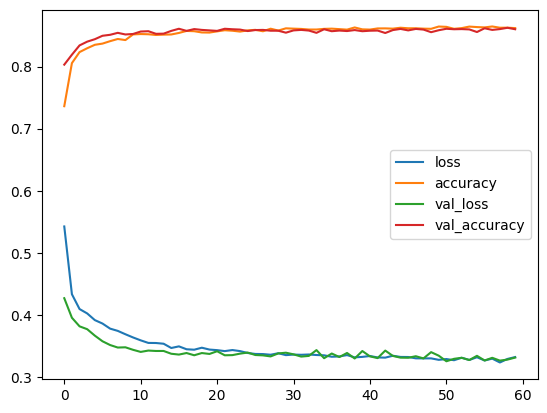

In [152]:
pd.DataFrame(history.history).plot()

In [153]:
nn_model.evaluate(X_test, y_test)

119/119 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8743


[0.3114185929298401, 0.8743427991867065]

Tried losses: MAE, MSE, binary cross entropy. All give around 87 % test accuracy. 

Training for more than 60 epochs results in overfitting and after the 30th epoch gains in accuracy are negligible.

Dropout layers seem to have no effect

Adding more layers and more units seems to have no effect

**CONCLUSION**: SVM performs as well as a neural net while being a lot less computationally expensive.